<a href="https://colab.research.google.com/github/HayoonJu/2024Fall_AI_AIDT/blob/main/WC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**☁️WORDCLOUD☁️**
## **- Wordcloud Title guessing app**


In [2]:
!pip install gradio wordcloud matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 11.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://77627e4009d074ff97.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


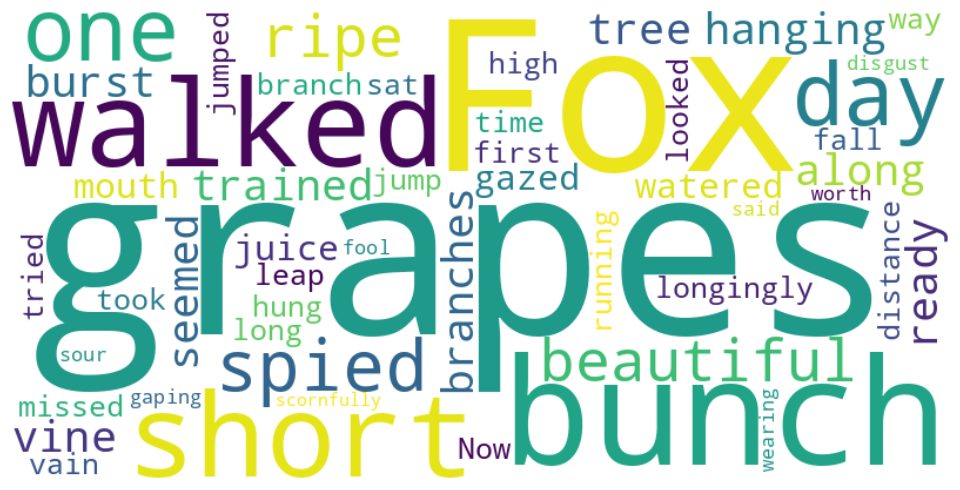

In [3]:
import gradio as gr
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 동화 내용
aesop_text = """
A Fox one day spied a beautiful bunch of ripe grapes hanging from a vine trained along the branches of a tree. The grapes seemed ready to burst with juice, and the Fox's mouth watered as he gazed longingly at them.

The bunch hung from a high branch, and the Fox had to jump for it. The first time he jumped he missed it by a long way. So he walked off a short distance and took a running leap at it, only to fall short once more. Again and again he tried, but in vain.

Now he sat down and looked at the grapes in disgust.

"What a fool I am," he said. "Here I am wearing myself out to get a bunch of sour grapes that are not worth gaping for."

And off he walked very, very scornfully.
"""  # Replace with the full text of the story

# 워드클라우드 생성 함수
def generate_wordcloud():
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(aesop_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout()
    plt.savefig("/content/wordcloud_image.png")  # Colab 경로에 저장
    return "/content/wordcloud_image.png"

# 정답 확인 함수
def check_title(user_input):
    correct_title = "The Fox and the Grapes"  # 문자열이 제대로 닫힘
    if user_input.lower() == correct_title.lower():
        return "Correct! The title is indeed 'The Fox and the Grapes.'"
    else:
        return f"Incorrect! The correct title is '{correct_title}'."

# Gradio 인터페이스 설정
def app_interface():
    wordcloud_image = generate_wordcloud()  # 워드클라우드 이미지 생성
    with gr.Blocks() as demo:
        gr.Markdown("# Wordcloud Title Guessing App")
        with gr.Row():
            gr.Image(wordcloud_image, label="Wordcloud")  # .style 제거
        title_input = gr.Textbox(label="Guess the Title of the Story")
        output = gr.Textbox(label="Result")
        submit_button = gr.Button("Submit")
        submit_button.click(fn=check_title, inputs=title_input, outputs=output)
    return demo

# Gradio 앱 실행
if __name__ == "__main__":
    app = app_interface()
    app.launch(share=True)  # 외부 접근 가능한 링크 생성

